In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
def nothing(x):
    pass

In [97]:
def hsv_filter(image, min_val_y, max_val_y,  min_val_w, max_val_w):
    """
    A function returning a mask for pixels within min_val - max_val range
    Inputs:
    - image - a BGR image you want to apply function on
    - min_val_y - array of shape (3,) giving miniumum HSV values for yellow color
    - max_val_y - array of shape (3,) giving maximum HSV values for yellow color
    - min_val_w - array of shape (3,) giving miniumum HSV values for white color
    - max_val_w - array of shape (3,) giving maximum HSV values for white color
    Returns:
    - img_filtered - image of pixels being in given threshold
    """
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask_yellow = cv2.inRange(hsv, min_val_y, max_val_y)
    mask_white = cv2.inRange(hsv, min_val_w, max_val_w)
    mask = cv2.bitwise_or(mask_yellow, mask_white)
    img_filtered = cv2.bitwise_and(image, image, mask=mask)
    
    return img_filtered

In [132]:
min_val_y = np.array([15,50,140])
max_val_y = np.array([25,255,255])
min_val_w = np.array([0,0,205])
max_val_w = np.array([180,255,255])

In [133]:
video = cv2.VideoCapture('Driving_India.avi')

#creating bars for selecting parameters for Canny Edge Detection
cv2.namedWindow('Driving in India - canny')
cv2.createTrackbar('lower', 'Driving in India - canny', 0, 255, nothing)
cv2.createTrackbar('upper', 'Driving in India - canny', 0, 255, nothing)

while video.isOpened():
    ret, frame = video.read()
    if ret:
        #retrieving parameters from trackbar
        lower = cv2.getTrackbarPos('lower', 'Driving in India - canny')
        upper = cv2.getTrackbarPos('upper', 'Driving in India - canny')
        
        frame = cv2.resize(frame,(600,400))
        frame_filtered = hsv_filter(frame, min_val_y, max_val_y, min_val_w, max_val_w)
        
        canny = cv2.Canny(frame_filtered, lower, upper)
        cv2.imshow('Driving in India - canny', canny)
        cv2.imshow('Driving in India - filtered', frame_filtered)
        cv2.imshow('Driving in India - original', frame)
    else:
        break
    if cv2.waitKey(50) & 0xFF == ord('q'):
        break
    

video.release()
cv2.destroyAllWindows()

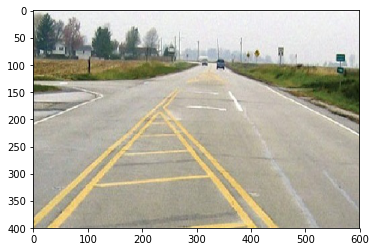

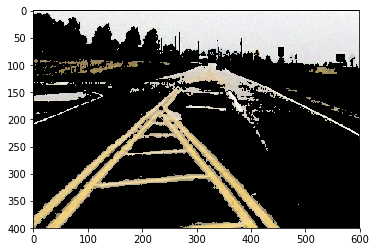

In [134]:
yellow_lane = cv2.imread("yellow_lane.jpg", 1)
yellow_lane = cv2.resize(yellow_lane,(600,400))
plt.imshow(cv2.cvtColor(yellow_lane, cv2.COLOR_BGR2RGB))
plt.show()

yellow_filtered = hsv_filter(yellow_lane, min_val_y, max_val_y, min_val_w, max_val_w)
plt.imshow(cv2.cvtColor(yellow_filtered, cv2.COLOR_BGR2RGB))
plt.show()

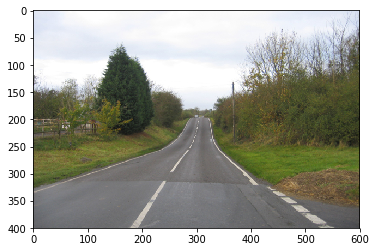

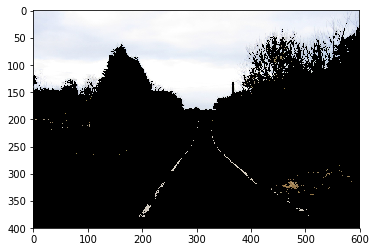

In [135]:
white_lane = cv2.imread("white_lane.jpg", 1)
white_lane = cv2.resize(white_lane,(600,400))
plt.imshow(cv2.cvtColor(white_lane, cv2.COLOR_BGR2RGB))
plt.show()

white_filtered = hsv_filter(white_lane, min_val_y, max_val_y, min_val_w, max_val_w)
plt.imshow(cv2.cvtColor(white_filtered, cv2.COLOR_BGR2RGB))
plt.show()